# Exploratory data anaylsis
Check validity and completness of data

In [70]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data/finalData2.csv")
df.drop(['Unnamed: 0'] , axis = 1, inplace = True)
df['time'] = pd.to_datetime(df['time'])
X,y = df.drop(['oerlikon', 'time','city'], axis = 1), df['city']
print(f"Read {df.size} datapoints")
df.head()

Read 5779214 datapoints


,time,city,oerlikon,weekday,minutes_since_midnight,opened,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),shortwave_radiation (W/m²),is_day ()
0,2024-01-24 16:43:08,155,140,2,1003,True,11.496778,74.594444,7.112444,0.243778,100.0,25.0060,49.373333,1.0
1,2024-01-24 16:43:38,154,140,2,1003,True,11.490944,74.636111,7.109111,0.245444,100.0,24.9910,49.273333,1.0
2,2024-01-24 16:45:31,163,140,2,1005,True,11.468972,74.793056,7.096556,0.251722,100.0,24.9345,48.896667,1.0
3,2024-01-24 16:46:02,163,141,2,1006,True,11.462944,74.836111,7.093111,0.253444,100.0,24.9190,48.793333,1.0
4,2024-01-24 16:46:32,162,143,2,1006,True,11.457111,74.877778,7.089778,0.255111,100.0,24.9040,48.693333,1.0


# Check continuintiy of data
To check wether the data scraping has holes or not. For better performance we are going to work with 50 min intervals in the data fro plotting.

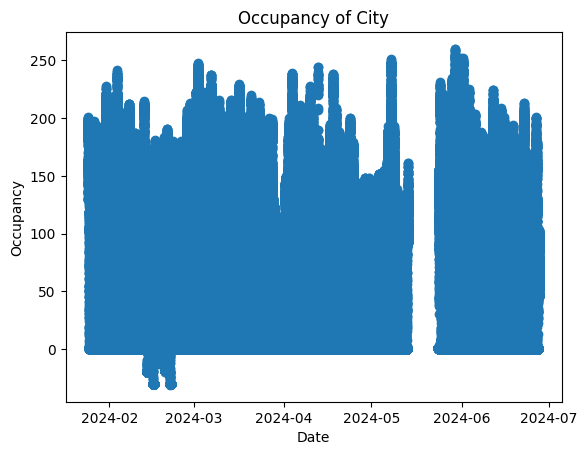

In [47]:
plt.scatter(df['time'], df['city'])
plt.xlabel("Date")
plt.ylabel("Occupancy")
plt.title("Occupancy of City")
plt.show()

As we can see there is some missing data in june. An there are some negative values present.

<Axes: >

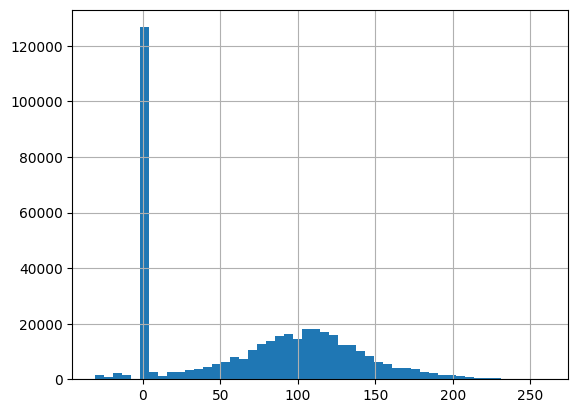

In [48]:
# Lets look at the distribution of city
df['city'].hist( bins=50)

Excluding the Zero values which arise because of the the time when the pool is closed the data almost looks normaly distributed. Lets try and validate this hypothesis.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


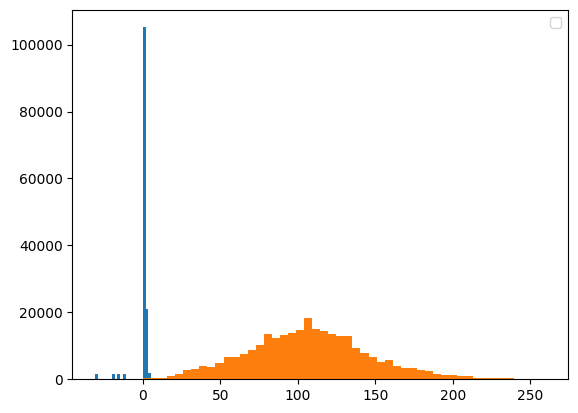

In [49]:
for i in range(2):
    plt.hist(df['city'].where(df['opened'] == i), bins = 50)

plt.legend()

Lets further test the normal distribution hypothesis with a QQ plot.

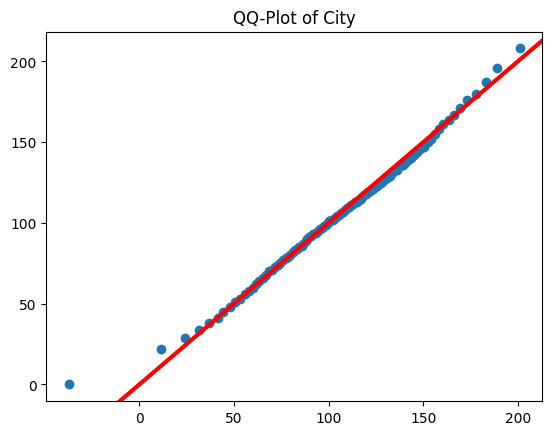

In [50]:
# Data
quantiles =  np.arange(0, 1, 0.01)
opened = df['opened'] == True
data_quantiles = df[opened]['city'].quantile(quantiles)

# Reference
std = df[opened]['city'].std()
mean = df[opened]['city'].mean()
rev = pd.DataFrame(np.random.normal(size=10000, loc = mean, scale=std))
rev_quantiles = rev.quantile(quantiles)

plt.scatter(rev_quantiles, data_quantiles)
plt.title("QQ-Plot of City")
plt.axline([0,0],[200,200], color = 'red',linewidth=3)
plt.show()


Looks very normal ;)

In [51]:
df['time'].min()

Timestamp('2024-01-24 16:43:08')

# Weather api
https://archive-api.open-meteo.com/v1/archive?latitude=47.3667&longitude=8.55&start_date=2024-01-01&end_date=2024-09-01&hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,cloud_cover,wind_speed_10m,shortwave_radiation,is_day&timezone=Europe%2FBerlin

Source: Zippenfenig, P. (2023). Open-Meteo.com Weather API [Computer software]. Zenodo. https://doi.org/10.5281/ZENODO.7970649

Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2023). ERA5 hourly data on single levels from 1940 to present [Data set]. ECMWF. https://doi.org/10.24381/cds.adbb2d47

Muñoz Sabater, J. (2019). ERA5-Land hourly data from 2001 to present [Data set]. ECMWF. https://doi.org/10.24381/CDS.E2161BAC

Schimanke S., Ridal M., Le Moigne P., Berggren L., Undén P., Randriamampianina R., Andrea U., Bazile E., Bertelsen A., Brousseau P., Dahlgren P., Edvinsson L., El Said A., Glinton M., Hopsch S., Isaksson L., Mladek R., Olsson E., Verrelle A., Wang Z.Q. (2021). CERRA sub-daily regional reanalysis data for Europe on single levels from 1984 to present [Data set]. ECMWF. https://doi.org/10.24381/CDS.622A565A

In [52]:
df = pd.read_csv("data/weather2.csv", header=2)
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),shortwave_radiation (W/m²),is_day ()
0,2024-01-01T00:00,1.7,89,-1.5,0.0,0,7.1,0.0,0
1,2024-01-01T01:00,3.1,82,-0.9,0.0,0,13.2,0.0,0
2,2024-01-01T02:00,3.4,80,-0.8,0.0,14,14.4,0.0,0
3,2024-01-01T03:00,2.7,83,-0.8,0.0,82,9.7,0.0,0
4,2024-01-01T04:00,3.8,75,-0.4,0.0,59,14.0,0.0,0


# Correlated features


In [61]:
corlist = X.corr().stack().reset_index()
corlist.columns = ['Feature1', 'Feature2', 'cor']
corlist['abs_cor'] = abs(corlist['cor'])
corlist = corlist.where(corlist['Feature1'] !=  corlist['Feature2']).sort_values(by='abs_cor', ascending=False)
print(corlist.where(corlist['abs_cor'] > 0.3).dropna(axis=0, how='any'))

                       Feature1                    Feature2       cor  \
58    apparent_temperature (°C)         temperature_2m (°C)  0.989772   
38          temperature_2m (°C)   apparent_temperature (°C)  0.989772   
112                   is_day ()                      opened  0.768140   
32                       opened                   is_day ()  0.768140   
53     relative_humidity_2m (%)  shortwave_radiation (W/m²) -0.722841   
103  shortwave_radiation (W/m²)    relative_humidity_2m (%) -0.722841   
119                   is_day ()  shortwave_radiation (W/m²)  0.652273   
109  shortwave_radiation (W/m²)                   is_day ()  0.652273   
42          temperature_2m (°C)  shortwave_radiation (W/m²)  0.599938   
102  shortwave_radiation (W/m²)         temperature_2m (°C)  0.599938   
37          temperature_2m (°C)    relative_humidity_2m (%) -0.580931   
47     relative_humidity_2m (%)         temperature_2m (°C) -0.580931   
64    apparent_temperature (°C)  shortwave_radiatio

# Feature engineering
Not realy x but i am to lazy to correct


In [78]:
# Feature engineering
# Feature opened provide much information -> should be learned by model
X_cor = df
# combine windspeed and temperature https://www.meteoswiss.admin.ch/weather/weather-and-climate-from-a-to-z/wind-chill.html
# "Apparent temperature is the perceived feels-like temperature combining wind chill factor, relative humidity and solar radiation" - Open-meteo.com --> meaning that we can drop rh, temp, solar radiation, windspeed
X_cor = X_cor.drop(['temperature_2m (°C)', 'wind_speed_10m (km/h)', 'relative_humidity_2m (%)','shortwave_radiation (W/m²)', 'is_day ()','opened','oerlikon','time'], axis=1)

# Correct for humidity via relative heat index https://en.wikipedia.org/wiki/Heat_index
corlist = X_cor.drop(['city'], axis =1).corr().stack().reset_index()
corlist.columns = ['Feature1', 'Feature2', 'cor']
corlist['abs_cor'] = abs(corlist['cor'])
corlist = corlist.where(corlist['Feature1'] !=  corlist['Feature2']).sort_values(by='abs_cor', ascending=False)
print(corlist.where(corlist['abs_cor'] > 0.3).dropna(axis=0, how='any'))



              Feature1            Feature2       cor   abs_cor
23     cloud_cover (%)  precipitation (mm)  0.327701  0.327701
19  precipitation (mm)     cloud_cover (%)  0.327701  0.327701


All corelations above 0.33 have been elimnated

In [79]:
X_cor.to_csv("data/uncor_features.csv", index=False)